In [1]:
import pandas as pd
import numpy as np

In [3]:
price = pd.read_csv("airbnb_price.csv")
room = pd.read_excel("airbnb_room_type.xlsx")
review = pd.read_csv("airbnb_last_review.tsv", delimiter='\t')

## Basic Analysis

In [4]:
no_pvt_rooms = len(room[room["room_type"].str.upper() == 'PRIVATE ROOM'])

In [5]:
price["price"] = price["price"].str.replace(" dollars",".0")

In [6]:
price["price"] = price["price"].astype(float)

In [7]:
avg_price = price["price"].mean().round(2)

In [8]:
review["last_review"] = pd.to_datetime(review["last_review"])

In [9]:
last_review = review["last_review"].max()

In [10]:
first_review = review["last_review"].min()

In [11]:
arrays = np.array([[first_review, last_review, no_pvt_rooms, avg_price]])

In [12]:
df = pd.DataFrame(arrays, columns = ['first_review', 'last_review', 'no_pvt_rooms', 'avg_price'])

In [13]:
df.to_csv("review_dates.csv", index=False)

## Intermediate Analysis

In [14]:
top = price.groupby(["nbhood_full"])["price"].mean().sort_values(ascending=False).head()

In [15]:
top =top.reset_index()

In [16]:
price.groupby(["nbhood_full"])["price"].count().sort_values(ascending=False)

nbhood_full
Brooklyn, Bedford-Stuyvesant                 2209
Brooklyn, Williamsburg                       1853
Manhattan, Harlem                            1435
Brooklyn, Bushwick                           1202
Manhattan, Hell's Kitchen                    1119
                                             ... 
Bronx, Co-op City                               1
Staten Island, Lighthouse Hill                  1
Staten Island, Howland Hook                     1
Staten Island, Bay Terrace, Staten Island       1
Staten Island, Willowbrook                      1
Name: price, Length: 217, dtype: int64

In [17]:
price[price["nbhood_full"] == "Manhattan, NoHo"].count()

listing_id     41
price          41
nbhood_full    41
dtype: int64

In [18]:
listings = []
for i in top["nbhood_full"].unique():
    info = price[price["nbhood_full"] == f"{i}"].count()
    listings.append(info.price)

In [19]:
listings

[2, 61, 36, 41, 191]

In [20]:
top["listings"] = listings

In [21]:
top

,nbhood_full,price,listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


In [22]:
top.rename(columns={
    'nbhood_full': 'neighborhood',
    'price': 'average_price',
    'listings': 'number_of_listings'
}, inplace=True)

In [23]:
top

,neighborhood,average_price,number_of_listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


## Word Analysis

## Advanced Analysis

In [25]:
price_room = pd.merge(room,price,how="left")

In [26]:
private_room_avg = price_room[price_room["room_type"].str.lower() == 'private room']["price"].mean()
private_room_avg

81.63816484677703

In [27]:
shared_room_avg = price_room[price_room["room_type"].str.lower() == 'shared room']["price"].mean()
shared_room_avg

53.465076660988075

In [28]:
apt_avg = price_room[price_room["room_type"].str.lower() == 'entire home/apt']["price"].mean()
apt_avg

197.16666666666666

## Bar Chart of Averages

In [29]:
import matplotlib.pyplot as plt

In [30]:
averages = [private_room_avg,shared_room_avg,apt_avg]
names = ['private_room_avg','shared_room_avg','apt_avg']

Text(0.5, 0, 'Names')

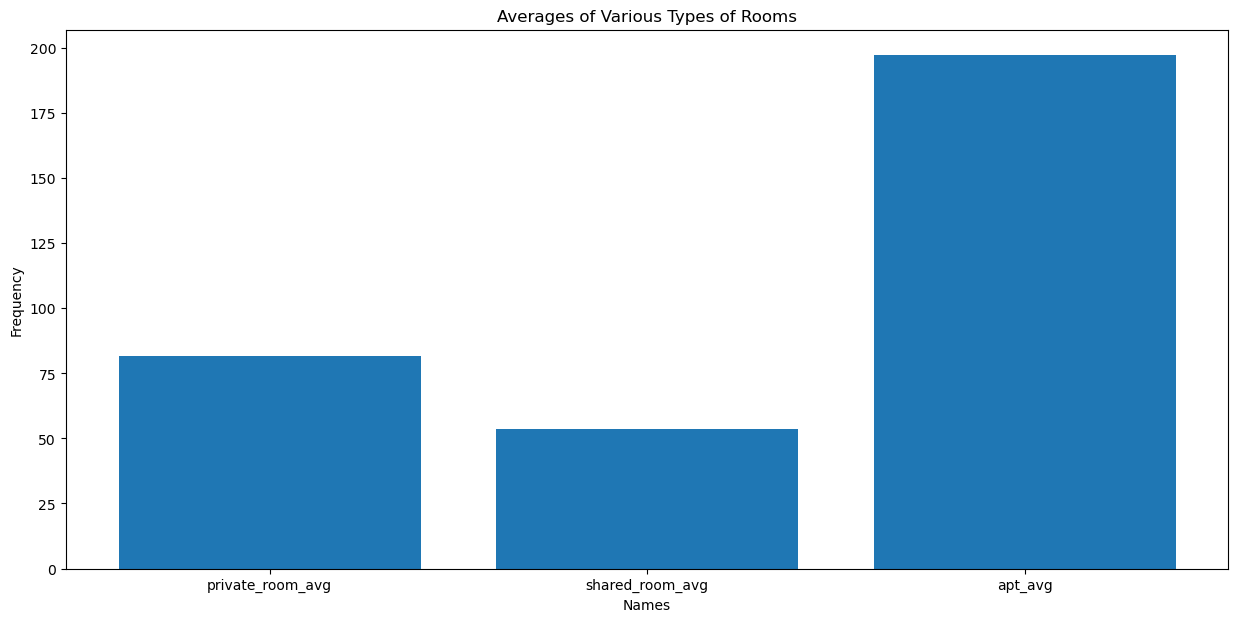

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(names,averages)
ax.set_title("Averages of Various Types of Rooms")
ax.set_ylabel('Frequency')
ax.set_xlabel('Names')


## Trends Over Time

In [70]:
review["last_review"] = pd.to_datetime(review["last_review"])

In [71]:
review_trend = review.groupby(["last_review"])["listing_id"].count()

## Line Graph to show Trend

In [72]:
review_trend = review_trend.reset_index()

In [73]:
review_trend = review_trend.rename(columns={
    "last_review": "date",
    "listing_id": "no_of_reviews"
})

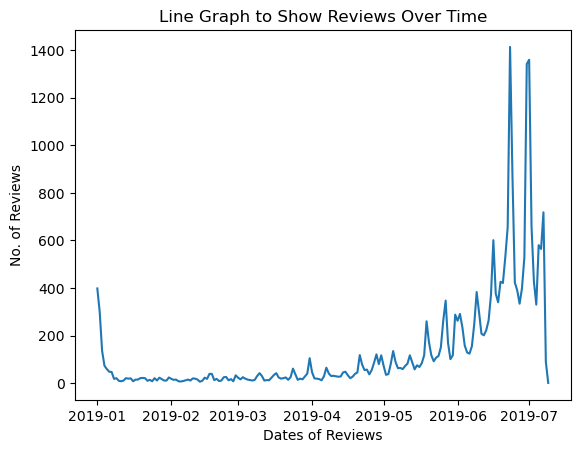

In [76]:
plt.xlabel("Dates of Reviews")
plt.ylabel("No. of Reviews")
plt.title("Line Graph to Show Reviews Over Time")
plt.plot(review_trend["date"], review_trend["no_of_reviews"])

## Scatter Plot by Matplotlib
o	Create a scatter plot with a regression line showing the relationship between price and the length of the description.

	Use matplotlib.axes.Axes.annotate to highlight outliers in the graph. (Note: Students should explore this function independently.)


In [81]:
prices = price_room["price"]

0        225.0
1         89.0
2        200.0
3         79.0
4        150.0
         ...  
25204    129.0
25205     45.0
25206    235.0
25207    100.0
25208     30.0
Name: price, Length: 25209, dtype: float64

In [89]:
word_length = price_room["description"].str.len()


Text(3000, 80, 'Outliers')

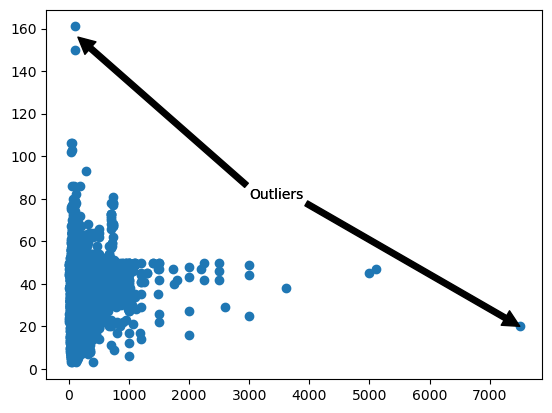

In [148]:
plt.scatter(prices,word_length)
plt.annotate('Outliers', xy=(7500, 20), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))
plt.annotate('Outliers', xy=(150, 156), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))

## Strip Plot

## Bar Chart Showing listings of Each Room Type

## Heatmap

## Pie Chart

## Histogram

## Violin Plot